In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot

In [4]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

In [5]:
selected_col = ['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'company_type_Pvt Ltd']

X_train = X_train[selected_col] 
X_test = X_test[selected_col]

# Tunning Model

In [6]:
param = []

for n_neighbors in (3,5,10,20):
    for weights in ('uniform', 'distance'):
        for p in range (1,4):
            model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p, n_jobs=-1)
            result = training(X_train, X_test, Y_train, Y_test, model)
            print(n_neighbors,weights, p)
            print(result['test_score'])
            print(result['train_score'])
            print()
            param.append((result['test_score'],result['train_score'],n_neighbors,weights, p))

3 uniform 1
0.6177372842545152
0.8862762013178433

3 uniform 2
0.5878316684317486
0.8817757046600352

3 uniform 3
0.583153962847411
0.8806090619450606

3 distance 1
0.6125552780719581
0.9999909310236272

3 distance 2
0.5814033116753012
0.9999909310236272

3 distance 3
0.5776384992987377
0.9999909310236272

5 uniform 1
0.6271027134556486
0.8384008694521308

5 uniform 2
0.6055705627271947
0.8306722169715818

5 uniform 3
0.593112423791396
0.8307384296366106

5 distance 1
0.6265420614248505
0.9999909310236272

5 distance 2
0.599198557403326
0.9999909310236272

5 distance 3
0.5877388227380714
0.9999909310236272

10 uniform 1
0.6528166771617483
0.7874459233729063

10 uniform 2
0.6194738028451212
0.7738185185436467

10 uniform 3
0.6064111829865186
0.7698446507191116

10 distance 1
0.6452362466725821
0.9999909310236272

10 distance 2
0.6150565661047027
0.9999909310236272

10 distance 3
0.6028767853564989
0.9999909310236272

20 uniform 1
0.6572317671809257
0.7517209524855768

20 uniform 2
0.627

In [7]:
param.sort()
param[::-1]

[(0.6572317671809257, 0.7517209524855768, 20, 'uniform', 1),
 (0.6529304533875262, 0.9999909310236272, 20, 'distance', 1),
 (0.6528166771617483, 0.7874459233729063, 10, 'uniform', 1),
 (0.6452362466725821, 0.9999909310236272, 10, 'distance', 1),
 (0.627450840083579, 0.7297554691010266, 20, 'uniform', 2),
 (0.6271027134556486, 0.8384008694521308, 5, 'uniform', 1),
 (0.6265420614248505, 0.9999909310236272, 5, 'distance', 1),
 (0.6247372055414031, 0.9999909310236272, 20, 'distance', 2),
 (0.6194738028451212, 0.7738185185436467, 10, 'uniform', 2),
 (0.6177372842545152, 0.8862762013178433, 3, 'uniform', 1),
 (0.6156995091164095, 0.7218959789323796, 20, 'uniform', 3),
 (0.6150565661047027, 0.9999909310236272, 10, 'distance', 2),
 (0.6129642284683859, 0.9999909310236272, 20, 'distance', 3),
 (0.6125552780719581, 0.9999909310236272, 3, 'distance', 1),
 (0.6064111829865186, 0.7698446507191116, 10, 'uniform', 3),
 (0.6055705627271947, 0.8306722169715818, 5, 'uniform', 2),
 (0.6028767853564989, 0

# Importance feature

In [8]:
model = KNeighborsClassifier(n_neighbors=20, weights='uniform', p=1, n_jobs=-1)
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])

test_score:  0.6572317671809257
train_score:  0.7517209524855768


# Scoring Model

In [10]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')[selected_col]
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.6551790441439508


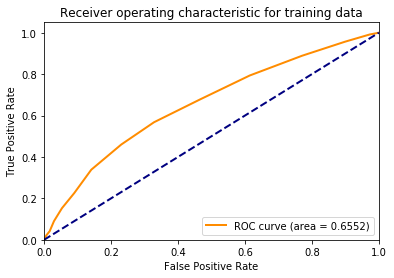

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()